In [22]:
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import re
import numpy as np

In [4]:
import requests
from bs4 import BeautifulSoup

# URL to scrape
url = "https://www.achievers.com/blog/employee-recognition-statistics/?utm_source=chatgpt.com"

# Send a GET request to the URL
response = requests.get(url)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract headers
    headers = [header.text.strip() for header in soup.find_all(['h1', 'h2', 'h3'])]
    print("Headers:")
    print(headers)

    # Extract paragraphs
    paragraphs = [p.text.strip() for p in soup.find_all('p')]
    print("\nParagraphs:")
    print(paragraphs[:10])  # Print the first 10 paragraphs

    # Extract lists
    lists = [li.text.strip() for li in soup.find_all('li')]
    print("\nLists:")
    print(lists[:10])  # Print the first 10 list items
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Headers:
['Top 20 employee recognition statistics for HR leaders in 2024', 'Insights and trends', '20 employee recognition statistics that prove its effectiveness', 'Statistics that show the impact recognition has on productivity', 'Statistics that show the impact recognition has on engagement', 'Statistics that show the impact recognition has on retention', 'Comparing employee recognition across countries', 'Get help with measuring employee recognition with statistics', 'In this article:', 'Interested in learning more about Achievers?']

Paragraphs:
['', 'by Iris Leung', 'Updated on September 27, 2024', 'Create a culture that means business™', 'Email address', 'In today’s workplace, employee recognition is more than just a nice-to-have – it’s a key driver of productivity, engagement, and retention. As organizations continue to face the ongoing challenge of attracting and retaining top talent, knowing the true impact of employee recognition programs is essential.', 'However, to make we

In [5]:
import requests
from bs4 import BeautifulSoup

# Fetch the webpage
url = "https://www.achievers.com/blog/employee-recognition-statistics/?utm_source=chatgpt.com"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract and organize data
headers = [header.text.strip() for header in soup.find_all(['h1', 'h2', 'h3'])]
paragraphs = [p.text.strip() for p in soup.find_all('p')]
lists = [li.text.strip() for li in soup.find_all('li')]

# Print neatly
print("Headers:")
for i, header in enumerate(headers, start=1):
    print(f"{i}. {header}")

print("\nKey Points (Lists):")
for i, item in enumerate(lists, start=1):
    print(f"{i}. {item}")

print("\nSummary (First Few Paragraphs):")
for i, paragraph in enumerate(paragraphs[:5], start=1):  # Limit to the first 5 paragraphs
    print(f"{i}. {paragraph}")


Headers:
1. Top 20 employee recognition statistics for HR leaders in 2024
2. Insights and trends
3. 20 employee recognition statistics that prove its effectiveness
4. Statistics that show the impact recognition has on productivity
5. Statistics that show the impact recognition has on engagement
6. Statistics that show the impact recognition has on retention
7. Comparing employee recognition across countries
8. Get help with measuring employee recognition with statistics
9. In this article:
10. Interested in learning more about Achievers?

Key Points (Lists):
1. Platform










Our platform

Discover the all-in-one platform to transform your people strategy, built to meet the needs of your changing workforce.






Solutions






Recognize™Employee recognition tools 







Listen™Capture voice of employee







Celebrate™Celebrate employee milestones







Reward™Best-in-class marketplace







Connect™Connections via virtual chats






Platform Quick Links
Integrations
2. Our 

In [7]:
data = {
    "headers": headers,
    "lists": lists,
    "paragraphs": paragraphs[:10]  # Limit to 10 paragraphs for brevity
}

with open("webpage_data.json", "w") as json_file:
    json.dump(data, json_file, indent=4)
print("Data saved to webpage_data.json")


Data saved to webpage_data.json


In [8]:
key_words = ['recognition', 'engagement', 'retention']
relevant_sentences = [p for p in paragraphs if any(word in p.lower() for word in key_words)]

print("Relevant Sentences:")
for sentence in relevant_sentences:
    print(sentence)

Relevant Sentences:
In today’s workplace, employee recognition is more than just a nice-to-have – it’s a key driver of productivity, engagement, and retention. As organizations continue to face the ongoing challenge of attracting and retaining top talent, knowing the true impact of employee recognition programs is essential.
For example, a Sirota Consulting survey reveals that only 51% of employees feel satisfied with the recognition they’re given for a job well done. This suggests that managers may be overlooking the importance of expressing appreciation or failing to deliver it in a way that resonates with employees. Statistics like this can provide valuable insights while guiding HR practitioners in coaching managers to improve their approach to employee recognition.
Armed with the latest data on employee recognition, organizations can gain valuable insight into what motivates their workforce, optimize recognition strategies, ultimately creating a culture where employees are at thei

In [16]:
read = re
numerical_data = [re.findall(r'\d+', p) for p in paragraphs if re.search(r'\d+', p)]
print("Extracted Numbers:", numerical_data)

Extracted Numbers: [['27', '2024'], ['51'], ['2024'], ['60', '61'], ['1', '40', '25'], ['36', '22'], ['2', '24', '27', '10'], ['3', '10', '10'], ['3', '36', '22'], ['2023'], ['4', '11', '1'], ['5', '40'], ['6', '2', '7'], ['2', '7'], ['7', '90'], ['92'], ['8', '55'], ['9', '74'], ['10', '38'], ['25', '17', '16'], ['11'], ['12', '57'], ['2022'], ['2023', '39'], ['13', '88'], ['54'], ['14', '45', '19'], ['2023'], ['53', '30', '18'], ['15', '53'], ['70'], ['16', '89', '68', '65'], ['17', '60', '52'], ['2024', '3', '600', '27', '19'], ['69', '61'], ['18', '40', '25'], ['19', '52', '15'], ['2024', '19', '15'], ['20', '60'], ['5', '55', '30'], ['1', '888', '622', '3343']]


In [17]:
# Extract numerical data along with the sentences
numerical_data_with_sentences = []
for paragraph in paragraphs:
    # Find all numbers in the paragraph
    numbers = re.findall(r'\d+', paragraph)
    if numbers:  # If numbers are found
        for num in numbers:
            numerical_data_with_sentences.append((int(num), paragraph))

# Display numerical data with their sentences
print("Extracted Numerical Data with Sentences:")
for num, sentence in numerical_data_with_sentences:
    print(f"Number: {num} | Sentence: {sentence}")

Extracted Numerical Data with Sentences:
Number: 27 | Sentence: Updated on September 27, 2024
Number: 2024 | Sentence: Updated on September 27, 2024
Number: 51 | Sentence: For example, a Sirota Consulting survey reveals that only 51% of employees feel satisfied with the recognition they’re given for a job well done. This suggests that managers may be overlooking the importance of expressing appreciation or failing to deliver it in a way that resonates with employees. Statistics like this can provide valuable insights while guiding HR practitioners in coaching managers to improve their approach to employee recognition.
Number: 2024 | Sentence: Achievers Workforce Institute’s 2024 State of Recognition report reveals key trends and insights that are reshaping modern workplaces.
Number: 60 | Sentence: Besides peer recognition, another key trend is the growing role of recognition platforms in providing real-time feedback and rewards. Research shows that employees with access to a comprehens

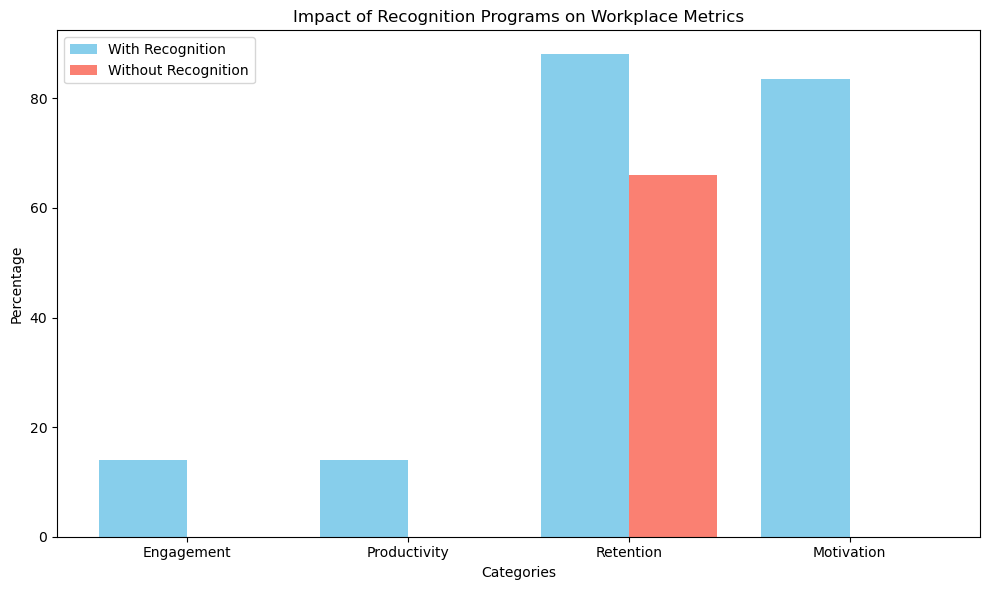

In [23]:
# Updated data based on validated statistics
categories = ['Engagement', 'Productivity', 'Retention', 'Motivation']
with_recognition = [14, 14, 88, 83.6]  # Metrics for workplaces with recognition
without_recognition = [0, 0, 66, 0]  # Metrics for workplaces without recognition (e.g., no increase)

# Bar positions
x = np.arange(len(categories))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, with_recognition, width=0.4, label='With Recognition', color='skyblue')
plt.bar(x + 0.2, without_recognition, width=0.4, label='Without Recognition', color='salmon')

# Labels and Title
plt.xticks(x, categories)
plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.title("Impact of Recognition Programs on Workplace Metrics")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
